In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

### **Exploratory Data Analysis:**

First,importing the data into the pandas dataframe

In [104]:
starcraft = pd.read_csv("starcraft_player_data.csv")
starcraft.head()


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


Secondly,let us understand the structure of the dataset in a better way

In [105]:
total_rows = starcraft.shape[0]
total_columns = starcraft.shape[1]
column_data_types = starcraft.dtypes
print("Total number of rows:", total_rows)
print("Total number of columns:",total_columns)


Total number of rows: 3395
Total number of columns: 20


### **Dataset Summary**

In [106]:
# dataset summary
starcraft.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


Understanding summary statistics

### **Cleaning of the data**:

In [107]:
# Convert the entire DataFrame to numeric type, replacing non-convertible values with NaN
starcraft = starcraft.applymap(pd.to_numeric, errors='coerce')

# Remove rows with NaN values
starcraft = starcraft.dropna()

# Optional: Reset the index if you want consecutive row numbers
starcraft = starcraft.reset_index(drop=True)


With this step,
We try to handle missing values by either imputing them or removing rows with missing values, based on the amount of missing data and the impact on the model.

As the data set has mixed types of data,we convert the values to numeric type and any non-convertible values are replaced NaN,also we ensures that non-convertible values.



In [108]:
#check the numbers of samples and features
print("The data size before dropping Id feature is : {} ".format(starcraft.shape))


#Save the 'Id' column
data_ID = starcraft['GameID']


#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
starcraft.drop("GameID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe data size after dropping Id feature is : {} ".format(starcraft.shape)) 

The data size before dropping Id feature is : (3338, 20) 

The data size after dropping Id feature is : (3338, 19) 


We can drop the GameID as we going to predict the rank using LeagueIndex,and GameID is just an identifier.

### **Feature Plotting**
Boxplots give us a good idea of the distribution of features within each league and how they compare between leagues.

### **Age by LeagueIndex**





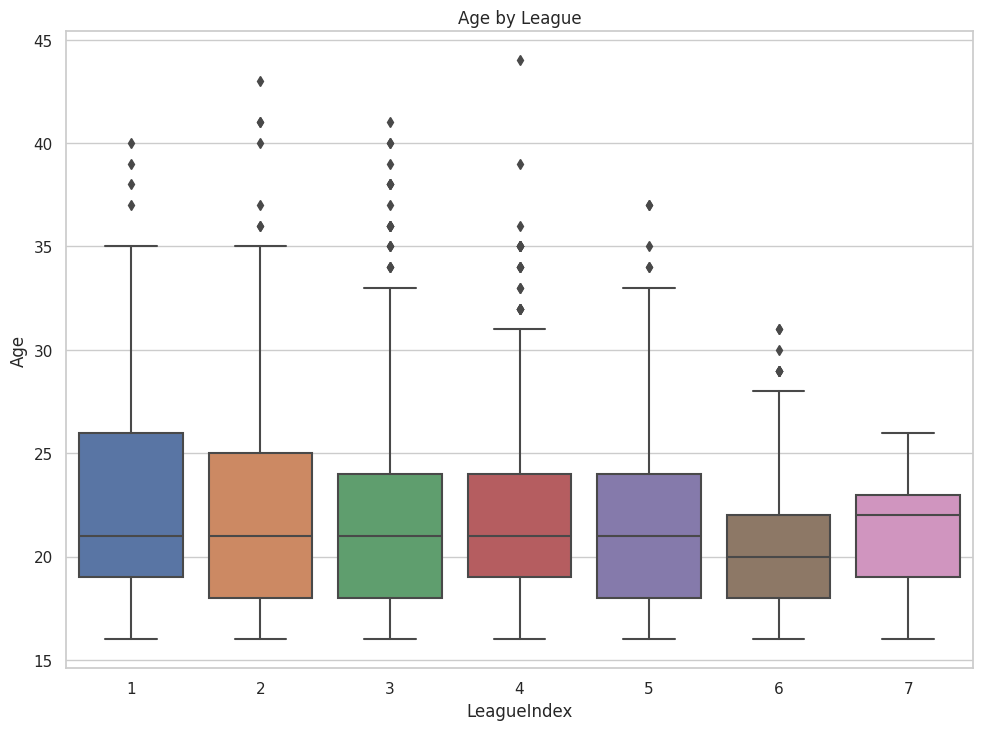

In [109]:
sns.set(style = "whitegrid", rc = {"figure.figsize":(11.7, 8.27)})
ax = sns.boxplot(x = "LeagueIndex", y = "Age", data = starcraft).set_title("Age by League")

Age has a fairly even distribution between leagues

### **HoursPerWeek by League**

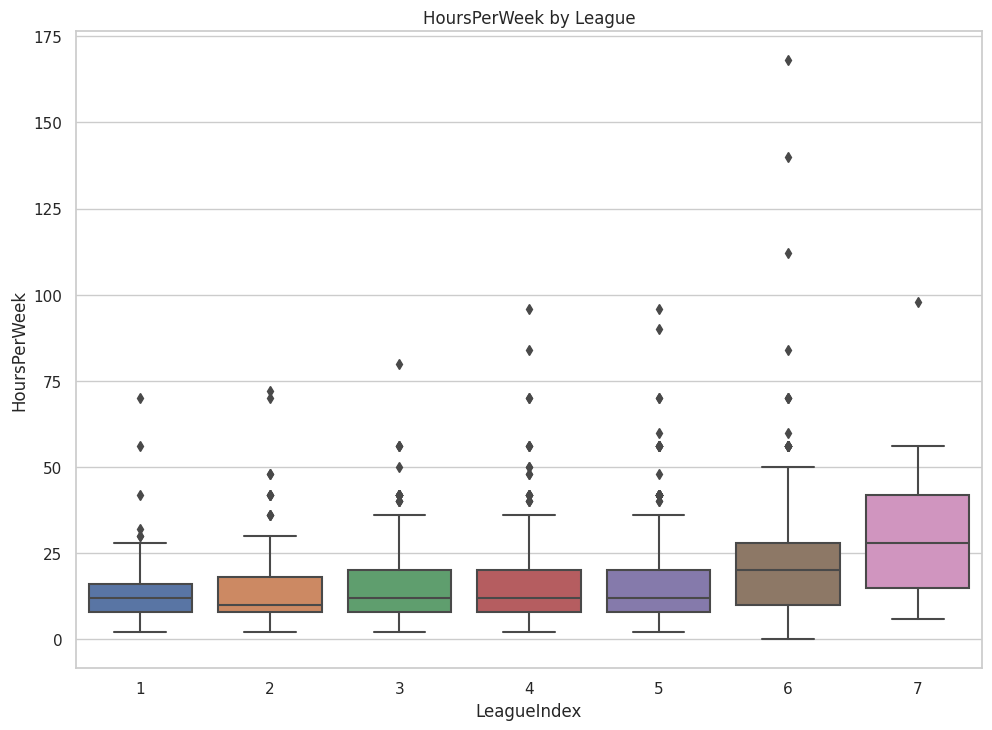

In [110]:
ax = sns.boxplot(x = "LeagueIndex", y = "HoursPerWeek", data = starcraft).set_title("HoursPerWeek by League")

 Playing the game more results in a better league

### **Totalhours by League**

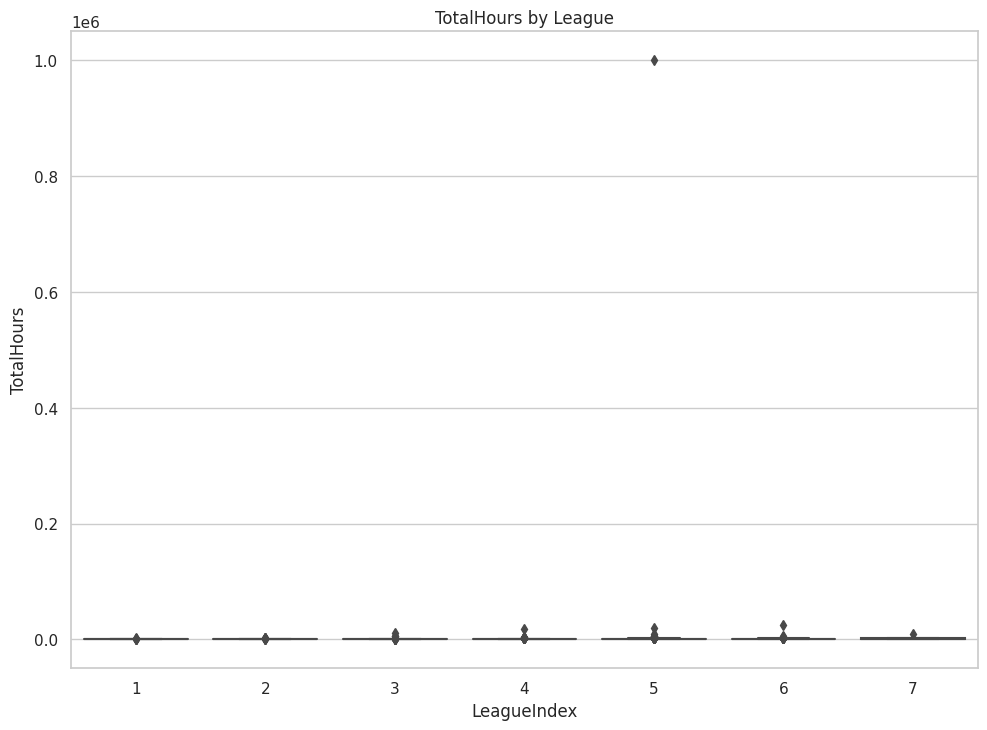

In [111]:
ax = sns.boxplot(x = "LeagueIndex", y = "TotalHours", data = starcraft).set_title("TotalHours by League")

Total hours played by everyone appears to be about the same.


### **APM by League**


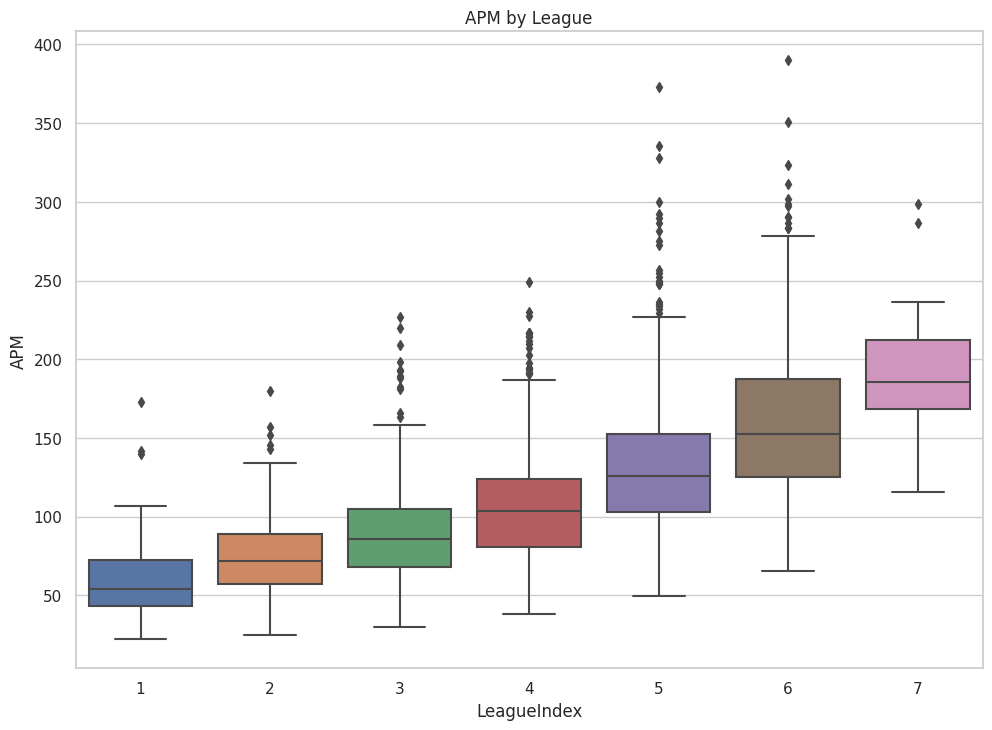

In [112]:
ax = sns.boxplot(x = "LeagueIndex", y = "APM", data = starcraft).set_title("APM by League")

Higher APM leads to higher league placement

### **SelectByHotKeys per Keys**

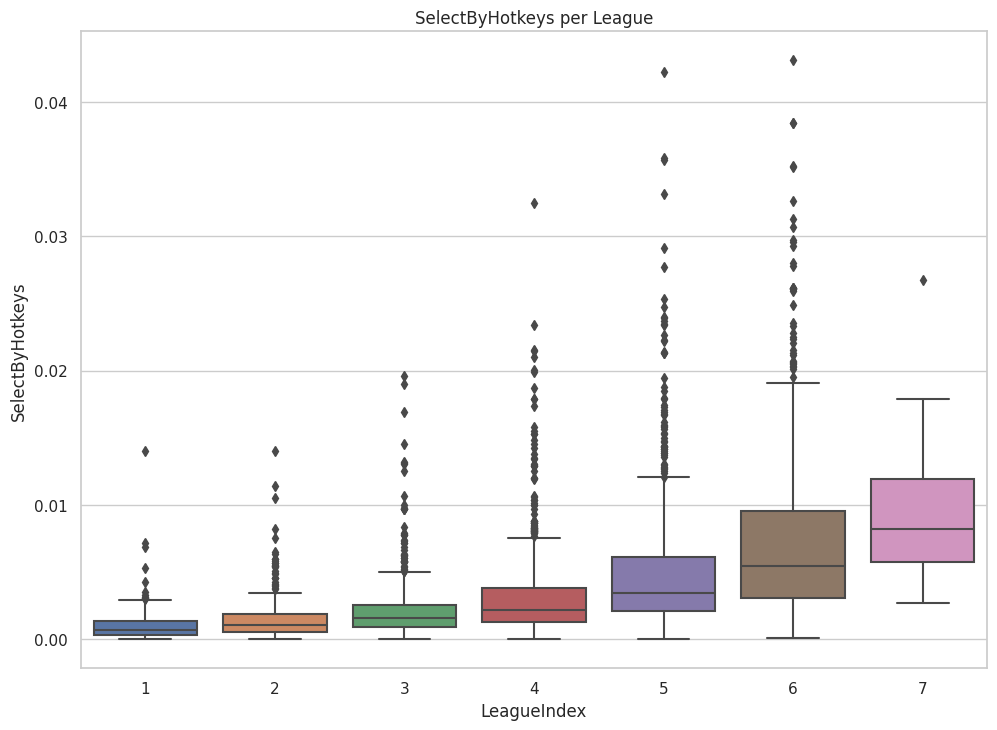

In [113]:
ax = sns.boxplot(x = "LeagueIndex", y = "SelectByHotkeys", data = starcraft).set_title("SelectByHotkeys per League")

Selecting more things by hotkeys means more efficient movement since constantly clikcing the buttons instead of using hotkeys makes a player slower.




### **AssignToHotkeys by League**

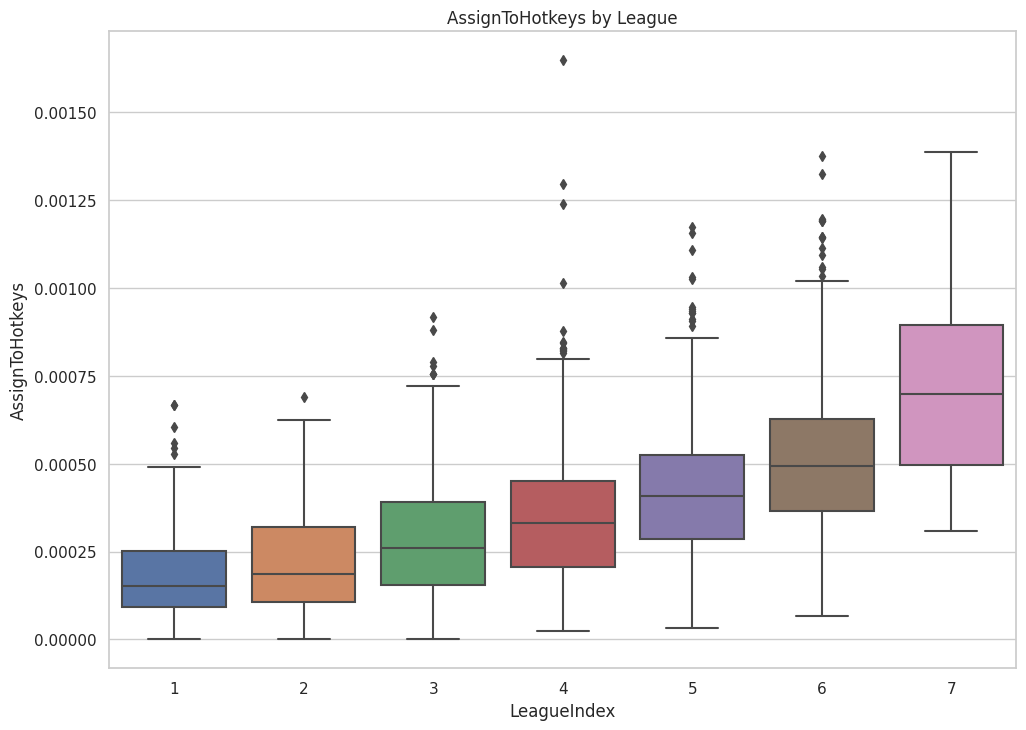

In [114]:
ax = sns.boxplot(x = "LeagueIndex", y = "AssignToHotkeys", data = starcraft).set_title("AssignToHotkeys by League")

From starcraft guides, the "select all army" hotkey is most frequently used, leading to less hotkeys used overall. More hotkeys, though, means better microing of your army. Shows here as a higher leagues placement relative to number of hotkeys assigned.

### **UniqueHotkeys by League**

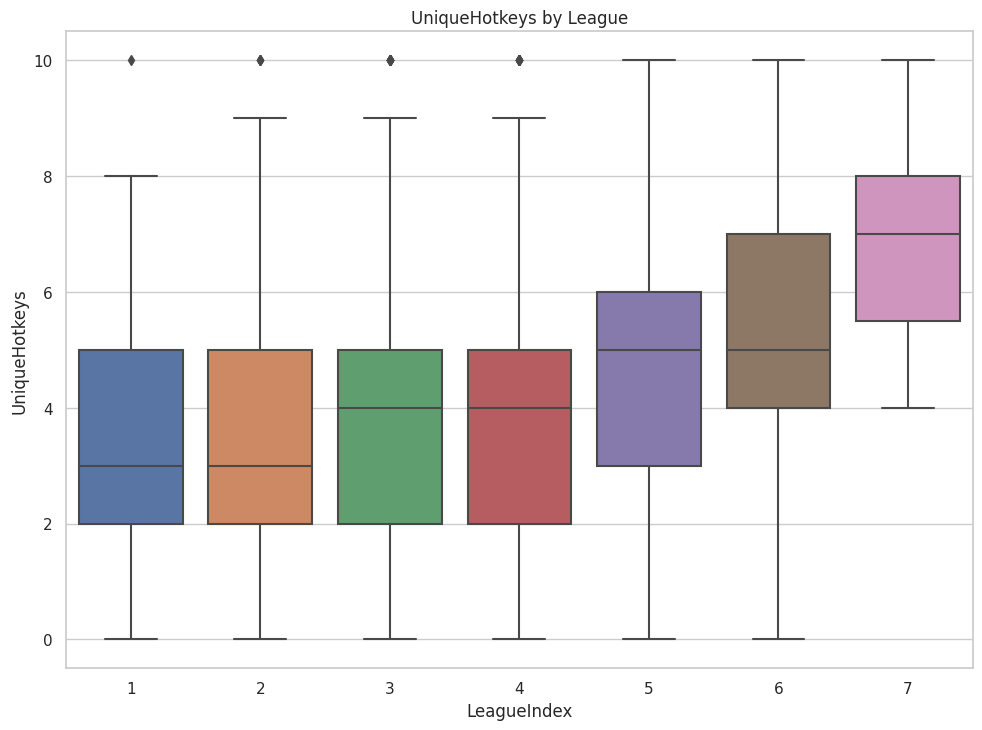

In [115]:
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueHotkeys", data = starcraft).set_title("UniqueHotkeys by League")

The mean rises while the interquartile ranges stay about the same.

### **MinimapAttacks by League**

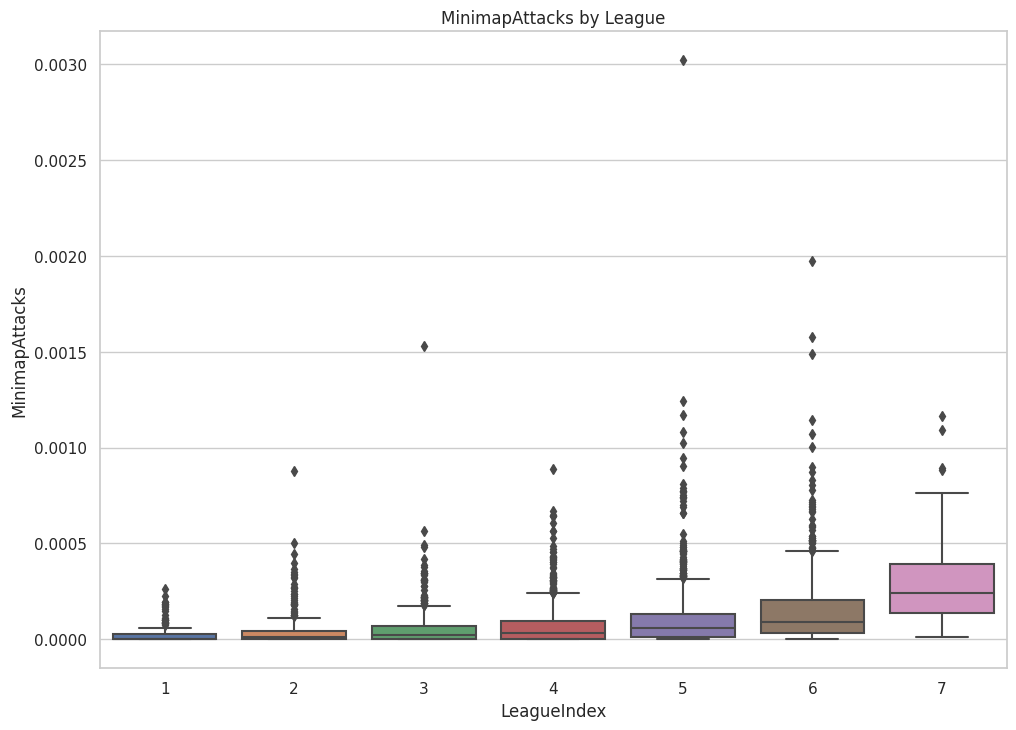

In [116]:
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapAttacks", data = starcraft).set_title("MinimapAttacks by League")

Attacking by clicking on the minimap seems to increase with league. Likely due to allowing a player to do other things while assigning their army to attack somewhere.

### **MinimapRightClicks by League**

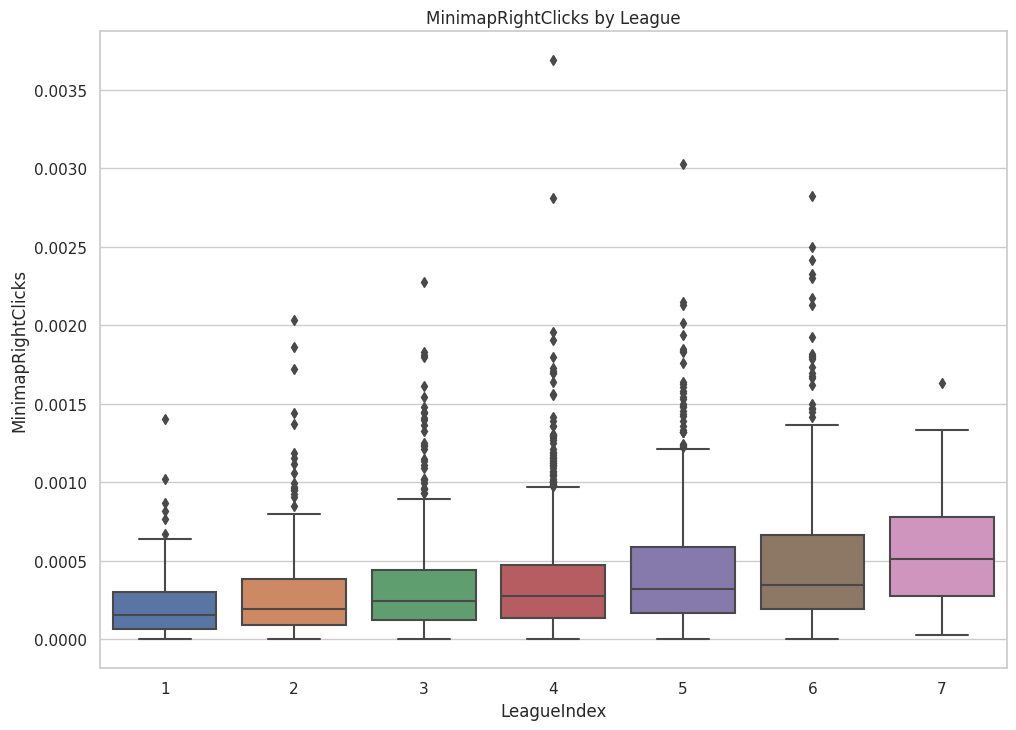

In [117]:
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapRightClicks", data = starcraft).set_title("MinimapRightClicks by League")

The right clicks allow for movement. Again, more efficiency and multi-tasking allowed with this method.

### **NumberOfPACs by League**

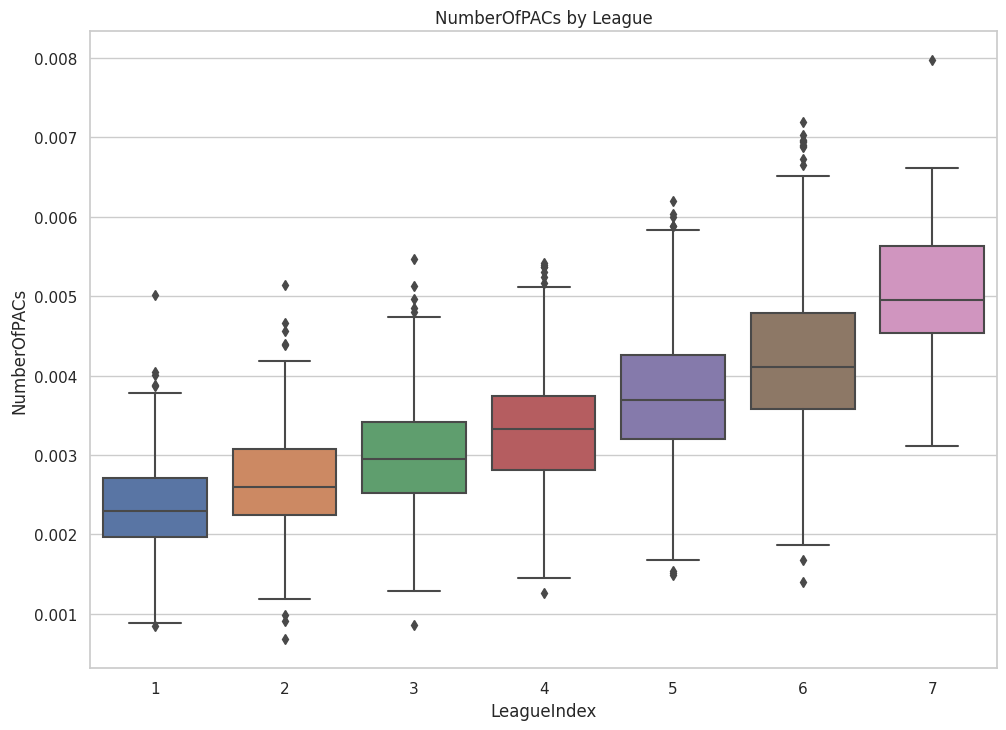

In [118]:
ax = sns.boxplot(x = "LeagueIndex", y = "NumberOfPACs", data = starcraft).set_title("NumberOfPACs by League")

Perception Action Cycle(PAC) or basically the ability to move the camera to an area, execute actions and then changes camera to another location. Higher PACs means a shorter time to figure out what needs to be done in each area, leading to a higher league.


### **GapBetweenPAcs by League**

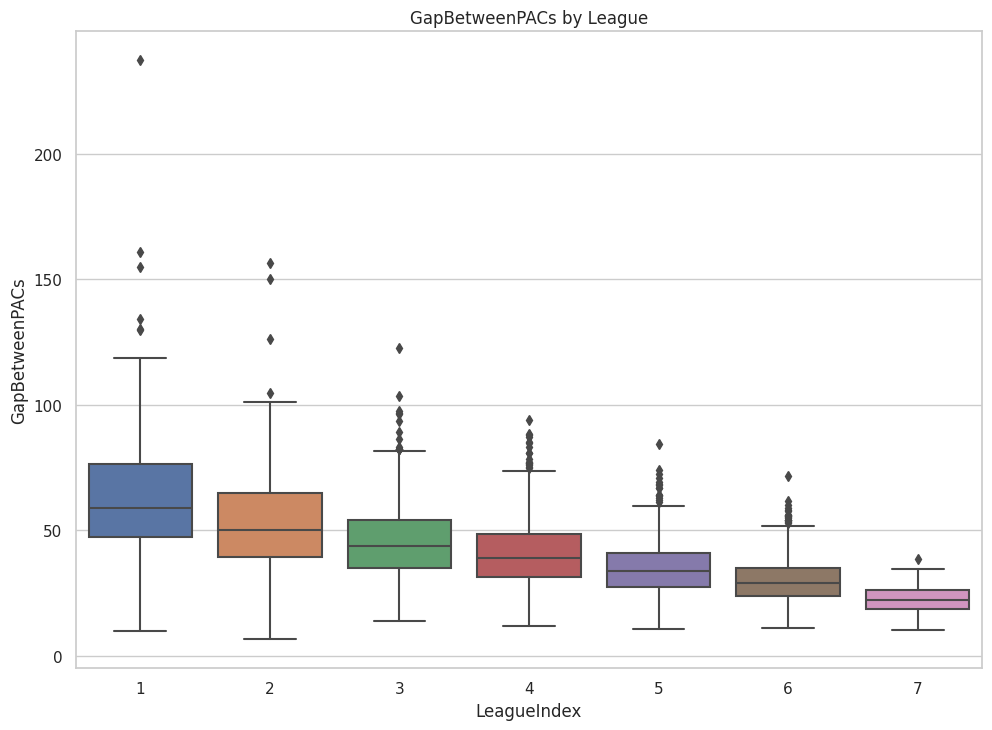

In [119]:
ax = sns.boxplot(x = "LeagueIndex", y = "GapBetweenPACs", data = starcraft).set_title("GapBetweenPACs by League")

Shorter gaps means less time spent thinking about what to do and more time spent doing. Shorter gap leads to a higher league.


### **ActionLatency by League**

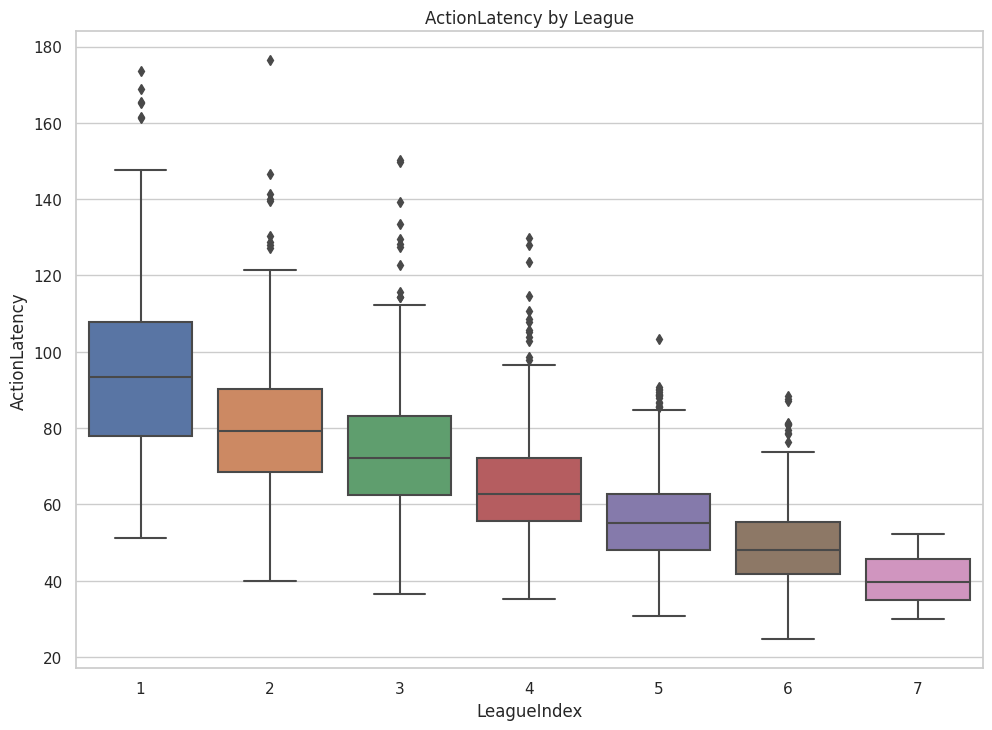

In [120]:
ax = sns.boxplot(x = "LeagueIndex", y = "ActionLatency", data = starcraft).set_title("ActionLatency by League")

The time required between moving camera to an area and then initiating an action. Lower Action Latency likely means better understanding of the game/better muscle memory which leads to a higher league.


### **ActionPAC by League**

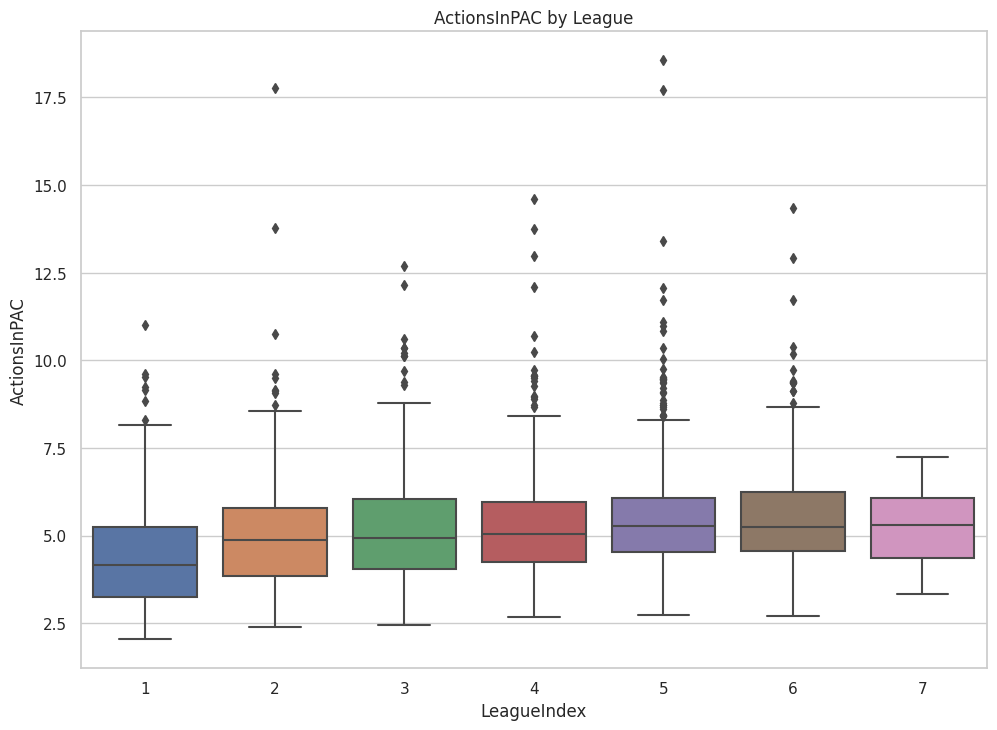

In [121]:
ax = sns.boxplot(x = "LeagueIndex", y = "ActionsInPAC", data = starcraft).set_title("ActionsInPAC by League")

Not much correlation with higher league likely due to it being more important to take less time to execute actions versus more actions on each screen

### **TotalMapExplored by League**

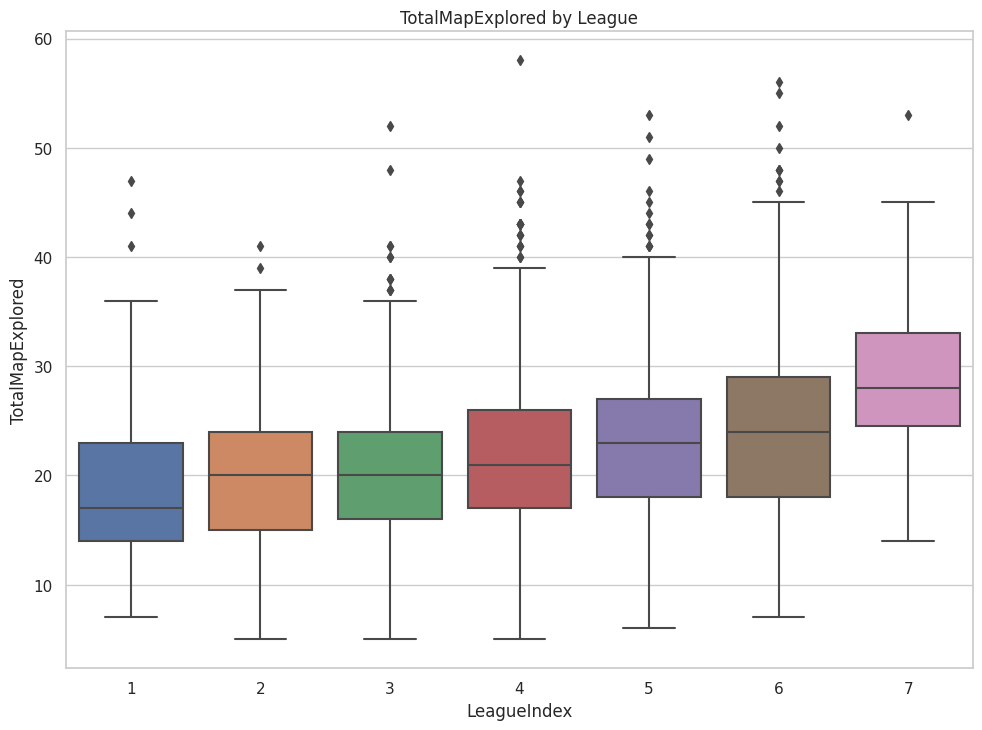

In [122]:
ax = sns.boxplot(x = "LeagueIndex", y = "TotalMapExplored", data = starcraft).set_title("TotalMapExplored by League")

More map explored leads to a higher league. This is likely due to greater emphasis on scouting as the league increases. If you don't know what your opponent is doing, then you won't be able to counter what they're doing.

### **WorkersMade by League**

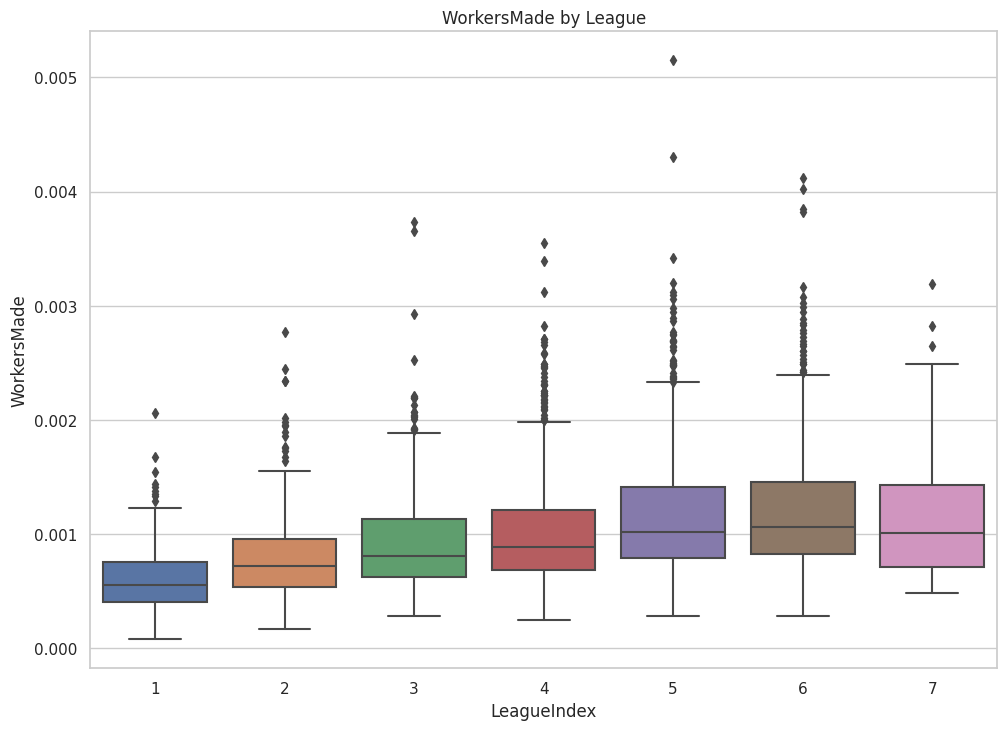

In [123]:
ax = sns.boxplot(x = "LeagueIndex", y = "WorkersMade", data = starcraft).set_title("WorkersMade by League")

Consistent worker production leads to a higher league placement. More workers means more mining and building so that makes pretty good sense.

### **UniqueUnitsMade by League**

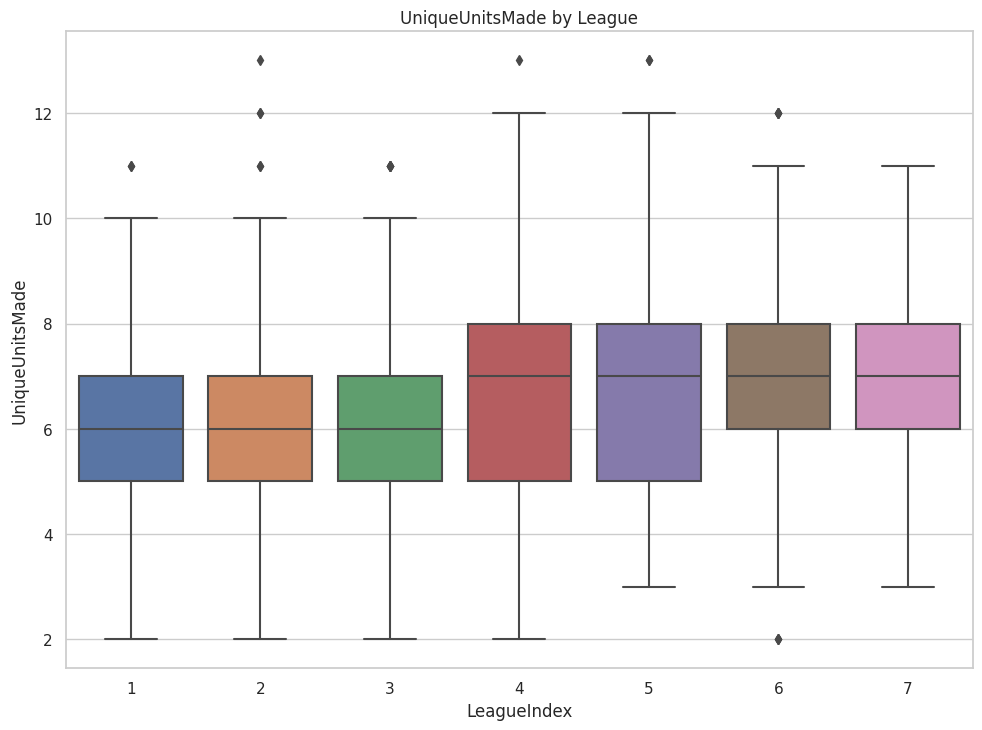

In [124]:
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueUnitsMade", data = starcraft).set_title("UniqueUnitsMade by League")

There is no coorelation here,There are only so many different units you can build for each race so there won't be a huge difference

### **ComplexUnitsMade by League**

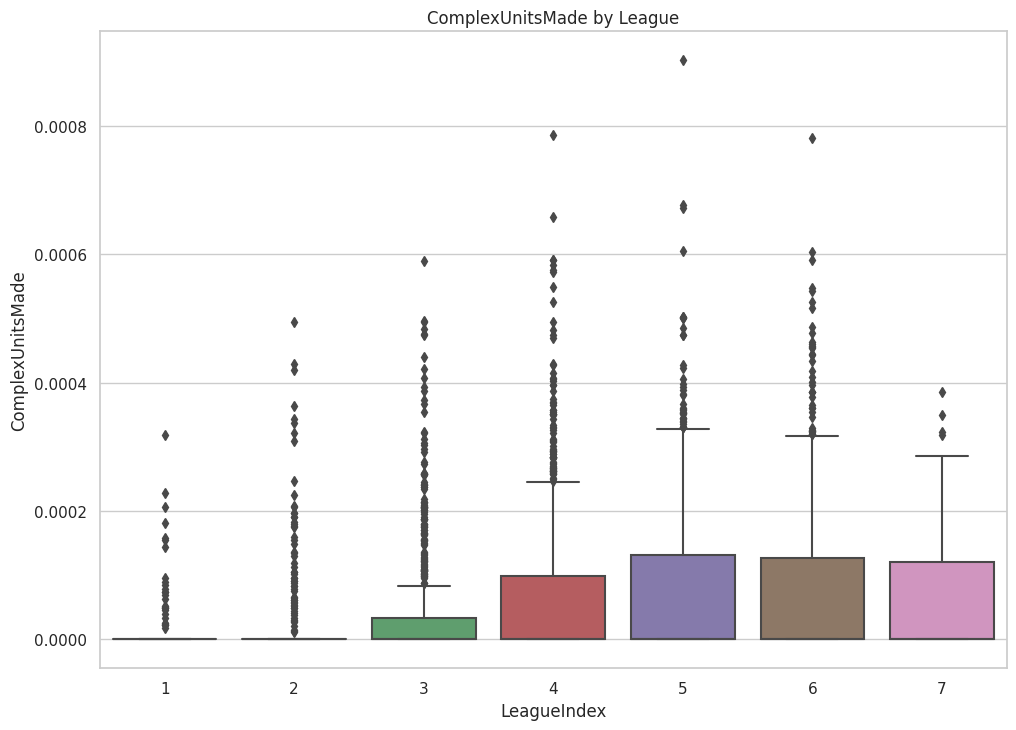

In [125]:
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexUnitsMade", data = starcraft).set_title("ComplexUnitsMade by League")

Complex units include ghosts, infestors and high templar. Units that require greater skill than just A-clicking the ground with them given their abilities. On the other hand, there's a greater range as the league increases but the mean number built stays at roughly the same, around 0.

### **ComplexAbilitiesUsed by League**

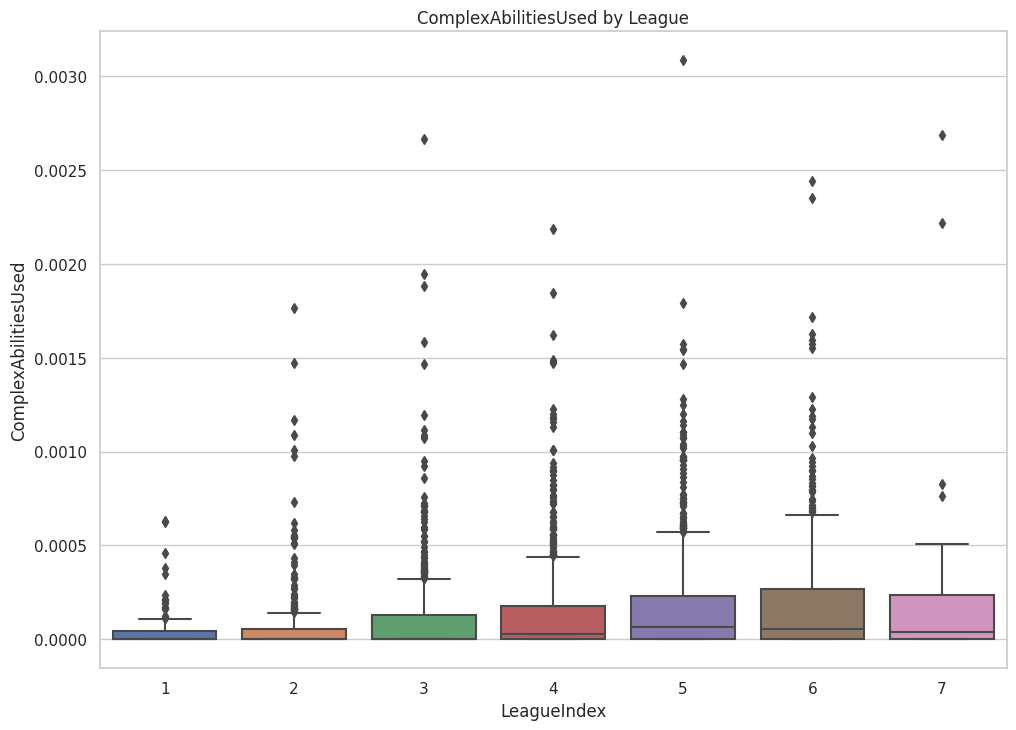

In [126]:
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexAbilitiesUsed", data = starcraft).set_title("ComplexAbilitiesUsed by League")

There is no coorelation. Complex actions require extra input so the amount used increases with league, but not by a huge amount.

**Considering the LeagueIndex as the y factor**

In [127]:
print("The data size before dropping LeagueIndex is : {} ".format(starcraft.shape))
y_data = starcraft['LeagueIndex']
starcraft.drop(['LeagueIndex'], axis=1, inplace=True)
print("data size is without LeagueIndex : {}".format(starcraft.shape))

The data size before dropping LeagueIndex is : (3338, 19) 
data size is without LeagueIndex : (3338, 18)


### **Skewness**

Checking for skewness of all the features that will help us predict the rank.


 mu = 114.58 and sigma = 48.10



<ipython-input-128-79eeebfd6fe9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(starcraft['APM'] , fit=norm);


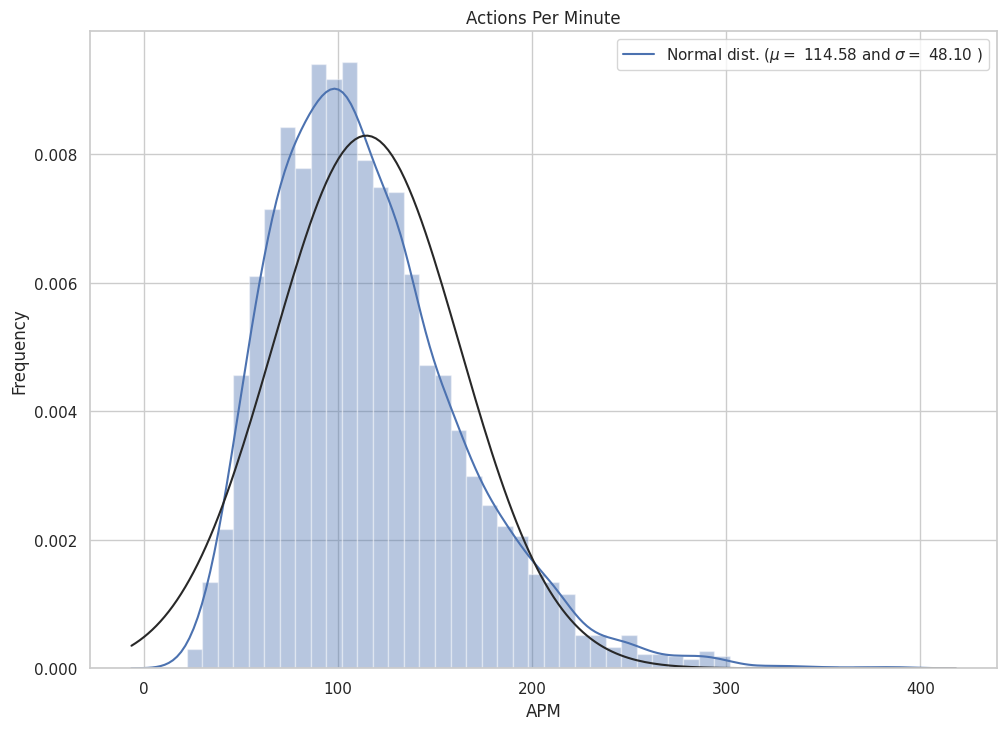

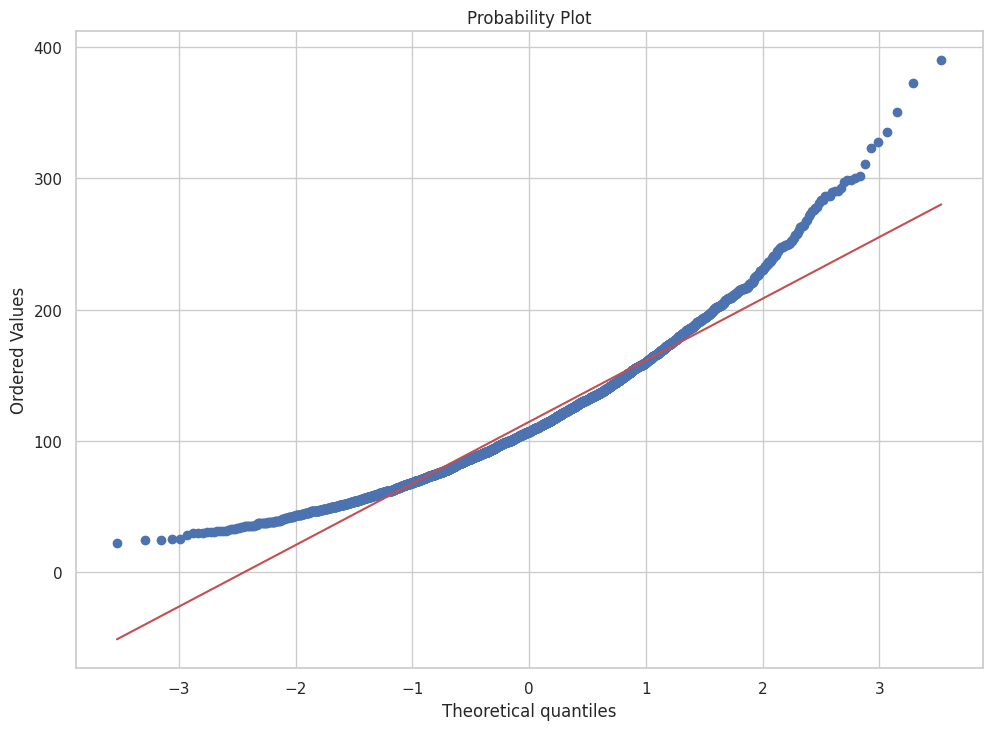

In [128]:
sns.distplot(starcraft['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(starcraft['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(starcraft['APM'], plot=plt)
plt.show()

From the graph,we can see that it is a bit skewed,let us look at the entire dataset to understand the skewness to apply transformations.

In [129]:
numeric_feats = starcraft.dtypes[starcraft.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = starcraft[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)


Skew in numerical features: 



,Skew
TotalHours,57.539478
MinimapAttacks,5.150198
ComplexAbilitiesUsed,3.799682
SelectByHotkeys,2.982392
HoursPerWeek,2.671956
ComplexUnitsMade,2.284495
MinimapRightClicks,2.219066
GapBetweenPACs,1.950846
WorkersMade,1.664480
ActionsInPAC,1.611997


### Observations:
If we observe,we can see that we can drop total hours as it is not accurate,and go for transformation of the data.

### **Transformation:**
We are going with Log transformationon the numerical features in the dataframe,we are considering the features(columns) that have skewness value greater than 0.75(indicating significant skewness).We then iterate through each skewed feature and perform log transformation which caluclates the natural logarithm of the values plus one.We are doing so to handle the skewed data.

In [130]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Log-Log transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    starcraft[feat] = np.log1p(starcraft[feat])

There are 18 skewed numerical features to Log-Log transform


Let us try checking for the skewness again after transforming.


 mu = 4.66 and sigma = 0.42



<ipython-input-131-79eeebfd6fe9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(starcraft['APM'] , fit=norm);


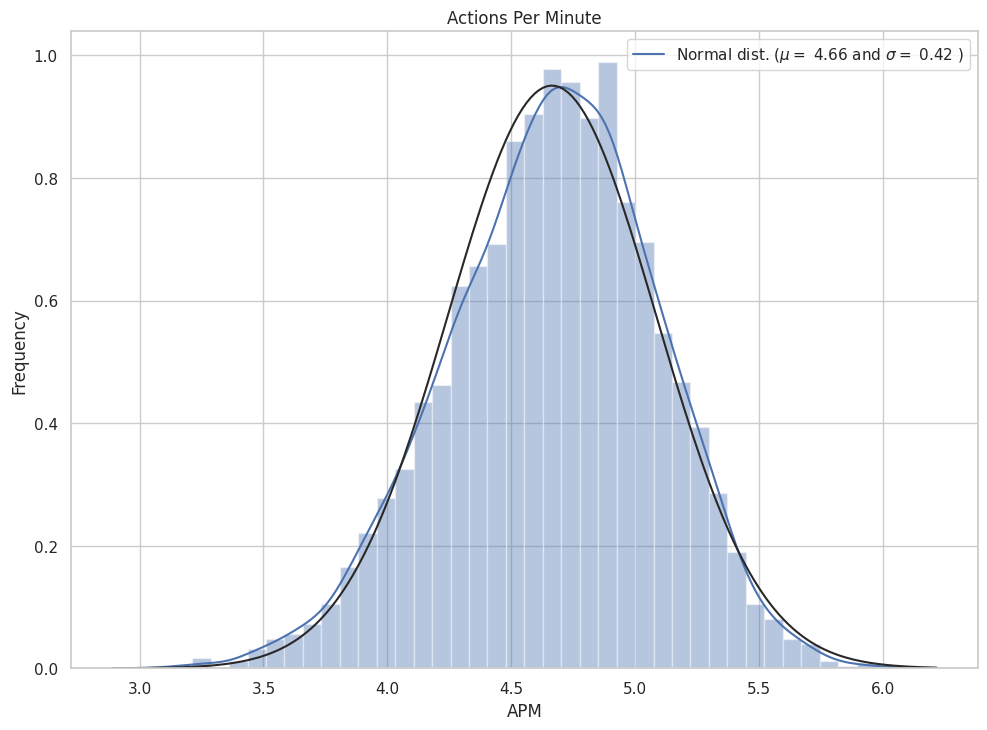

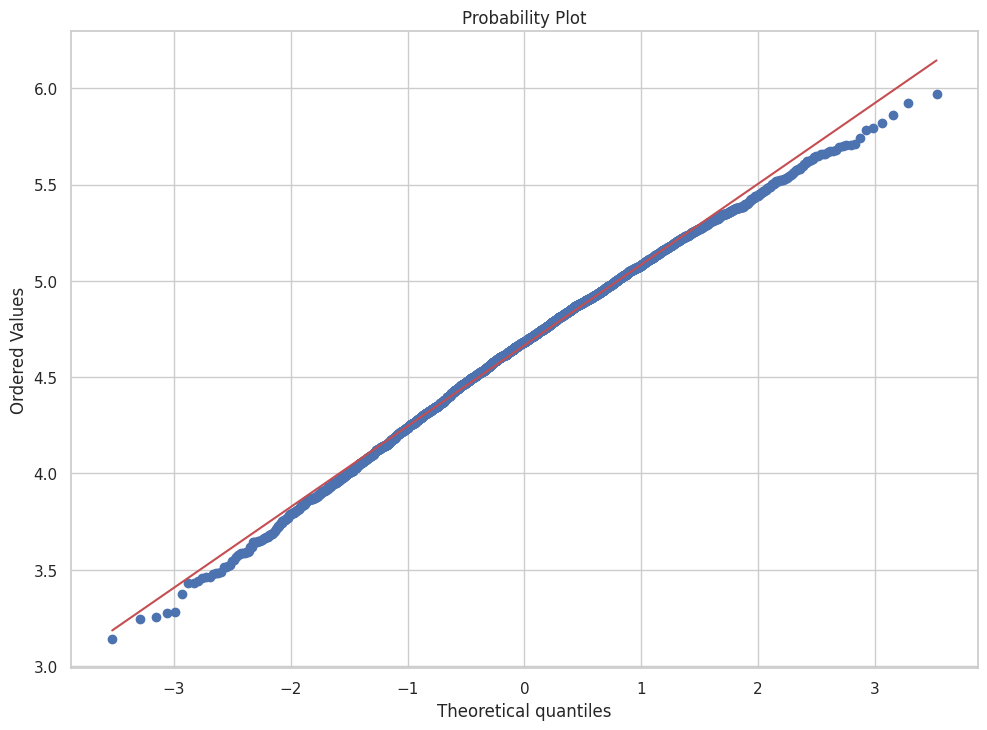

In [131]:
sns.distplot(starcraft['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(starcraft['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(starcraft['APM'], plot=plt)
plt.show()

It looks much better and the values have transformed,Let us go ahead and build the model


### **Modeling**

We are going to split the data as training and testing set.
We will do a general 80/20 split.
ntrain is the number of training data
we have a total of 3338 so you can slice off however much you want for the testing set
3338*0.2 = 667 , so lets set ntrain to 3338-667 = 2671 

In [132]:


ntrain  = 2671
train = starcraft[:ntrain]
test = starcraft[ntrain:]
y_train = y_data[:ntrain]
y_test = y_data[ntrain:]

 Validation function

In [133]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

For building the model,I'm trying to use the Gradient Boosting as it is an ensemble learning method that combines multiple weak learners (decision trees) to create a strong predictive model,my ideaology behind using this is capable of capturing complex relationships and non-linear patterns in the data.The model is robust to  outliers too.

In [134]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,
                                    max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [136]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean()*100, score.std()))


Gradient Boosting score: 89.9796 (0.0259)



The accuracy of our model is 89.97% which is considerabally good.


**Based on the EDA and model results, if the stakeholders plan to collect more data, I would provide the following guidance:**

**Identify Data Gaps:**

Review the existing dataset and identify any gaps or limitations in terms of the available features. Determine if the collected data covers a wide range of player characteristics and gameplay situations.

**Target Balanced Data Collection:**

 If the current dataset is imbalanced, meaning there are significant differences in the number of samples across different ranks, advise stakeholders to collect additional data in a way that ensures a more balanced representation of all player ranks. This will help prevent bias towards any particular rank and improve the model's ability to generalize.

**Focus on Important Features:**

Based on the feature importance analysis from the model, guide the stakeholders to prioritize the collection of additional data for features that have shown a strong influence on predicting player ranks. This will help refine the model and potentially improve its accuracy.

**Diverse Gameplay Scenarios:**

 Encourage the stakeholders to collect data from a diverse range of gameplay scenarios, maps, and game modes to capture a comprehensive representation of player performance. This will help the model generalize better across different situations.

**Monitor Data Quality:**

 Emphasize the importance of maintaining data quality during the collection